In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [55]:
pl_df = pd.read_csv("/Users/lewisclark/Desktop/PROJECTS/final_project/sheets_data/MASTER_DATA/final_master_pl.csv")
ll_df = pd.read_csv("/Users/lewisclark/Desktop/PROJECTS/final_project/sheets_data/MASTER_DATA/final_master_ll.csv")
bd_df = pd.read_csv("/Users/lewisclark/Desktop/PROJECTS/final_project/sheets_data/MASTER_DATA/final_master_bd.csv")
sa_df = pd.read_csv("/Users/lewisclark/Desktop/PROJECTS/final_project/sheets_data/MASTER_DATA/final_master_sa.csv")
l1_df = pd.read_csv("/Users/lewisclark/Desktop/PROJECTS/final_project/sheets_data/MASTER_DATA/final_master_l1.csv")

In [58]:
l1_df.head()

,Squad,Poss,90s,Gls,Ast,G_plus_A,G_minus_PK,xG,xAG,xG_plus_xAG,npxG_plus_xAG,PrgC,PrgP,CrdY,CrdR,Season,League,League_ID
0,Angers,41.2,34,0.91,0.50,1.41,0.76,1.06,0.69,1.75,1.61,502,953,49,2,2024-25,Ligue 1,5
1,Auxerre,42.5,34,1.38,1.03,2.41,1.26,1.21,0.94,2.15,2.04,484,1084,68,4,2024-25,Ligue 1,5
2,Brest,48.4,34,1.53,0.94,2.47,1.32,1.33,0.87,2.20,1.99,470,1096,69,3,2024-25,Ligue 1,5
3,Le Havre,43.1,34,1.09,0.62,1.71,0.82,1.22,0.72,1.94,1.70,538,1051,56,4,2024-25,Ligue 1,5
4,Lens,54.1,34,1.18,0.76,1.94,1.03,1.52,1.06,2.59,2.48,570,1451,86,8,2024-25,Ligue 1,5


In [63]:
sa_df.shape

(100, 18)

In [64]:
complete_table_df = pd.concat([pl_df, ll_df, bd_df, sa_df, l1_df], ignore_index=True)

In [65]:
complete_table_df.shape

(486, 18)

In [165]:
### POSESSION STATS ###

In [82]:
avg_possession_by_league = complete_table_df.groupby(['League', 'Squad'])['Poss'].mean().reset_index()

avg_possession_by_league.rename(columns={'Poss': 'Avg_Possession'}, inplace=True)

print(avg_possession_by_league)

         League          Squad  Avg_Possession
0    Bundesliga        Arminia       41.500000
1    Bundesliga       Augsburg       42.560000
2    Bundesliga  Bayern Munich       63.720000
3    Bundesliga         Bochum       45.725000
4    Bundesliga   Darmstadt 98       45.700000
..          ...            ...             ...
127     Serie A       Sassuolo       52.050000
128     Serie A         Spezia       47.333333
129     Serie A         Torino       50.580000
130     Serie A        Udinese       44.700000
131     Serie A        Venezia       43.700000

[132 rows x 3 columns]


In [83]:
league_possession_summary = avg_possession_by_league.groupby('League')['Avg_Possession'].mean().reset_index()
league_possession_summary.rename(columns={'Avg_Possession': 'League_Avg_Possession'}, inplace=True)
print(league_possession_summary)

           League  League_Avg_Possession
0      Bundesliga              48.584583
1         La Liga              49.329630
2         Ligue 1              48.738462
3  Premier League              48.056173
4         Serie A              49.010179


In [84]:
league_possession_std = avg_possession_by_league.groupby('League')['Avg_Possession'].std().reset_index()
league_possession_std.rename(columns={'Avg_Possession': 'Poss_StdDev'}, inplace=True)
print(league_possession_std)

           League  Poss_StdDev
0      Bundesliga     5.826388
1         La Liga     5.798829
2         Ligue 1     5.510226
3  Premier League     7.090914
4         Serie A     4.863261


In [106]:
league_possession_style = league_possession_summary.merge(league_possession_std, on='League')
print(league_possession_style)

           League  League_Avg_Possession  Poss_StdDev
0      Bundesliga              48.584583     5.826388
1         La Liga              49.329630     5.798829
2         Ligue 1              48.738462     5.510226
3  Premier League              48.056173     7.090914
4         Serie A              49.010179     4.863261


In [107]:
top5_overall_possession = avg_possession_by_league.sort_values(
    'Avg_Possession', ascending=False
).head(5).reset_index(drop=True)

print(top5_overall_possession)


           League            Squad  Avg_Possession
0         La Liga        Barcelona           65.32
1  Premier League  Manchester City           64.52
2         Ligue 1        Paris S-G           64.00
3      Bundesliga    Bayern Munich           63.72
4  Premier League        Liverpool           60.92


In [108]:
bottom5_overall_possession = avg_possession_by_league.sort_values(
    'Avg_Possession', ascending=True).head(5).reset_index(drop=True)

print(bottom5_overall_possession)

           League            Squad  Avg_Possession
0  Premier League        West Brom          37.900
1  Premier League    Sheffield Utd          38.750
2  Premier League  Nott'ham Forest          39.800
3         La Liga            Cádiz          40.325
4  Premier League     Ipswich Town          40.600


In [109]:
league_season_trends = complete_table_df.groupby(['League', 'Season'])['Poss'].median().reset_index()

league_season_trends.rename(columns={'Poss': 'Avg_Possession'}, inplace=True)

print(league_season_trends)

            League   Season  Avg_Possession
0       Bundesliga  2020-21           50.35
1       Bundesliga  2021-22           50.05
2       Bundesliga  2022-23           49.60
3       Bundesliga  2023-24           46.80
4       Bundesliga  2024-25           49.15
5          La Liga  2020-21           49.60
6          La Liga  2021-22           48.25
7          La Liga  2022-23           50.60
8          La Liga  2023-24           49.50
9          La Liga  2024-25           49.45
10         Ligue 1  2020-21           48.80
11         Ligue 1  2021-22           49.00
12         Ligue 1  2022-23           48.25
13         Ligue 1  2023-24           51.10
14         Ligue 1  2024-25           47.95
15  Premier League  2020-21           50.40
16  Premier League  2021-22           50.30
17  Premier League  2022-23           49.05
18  Premier League  2023-24           49.75
19  Premier League  2024-25           49.50
20         Serie A  2020-21           50.30
21         Serie A  2021-22     

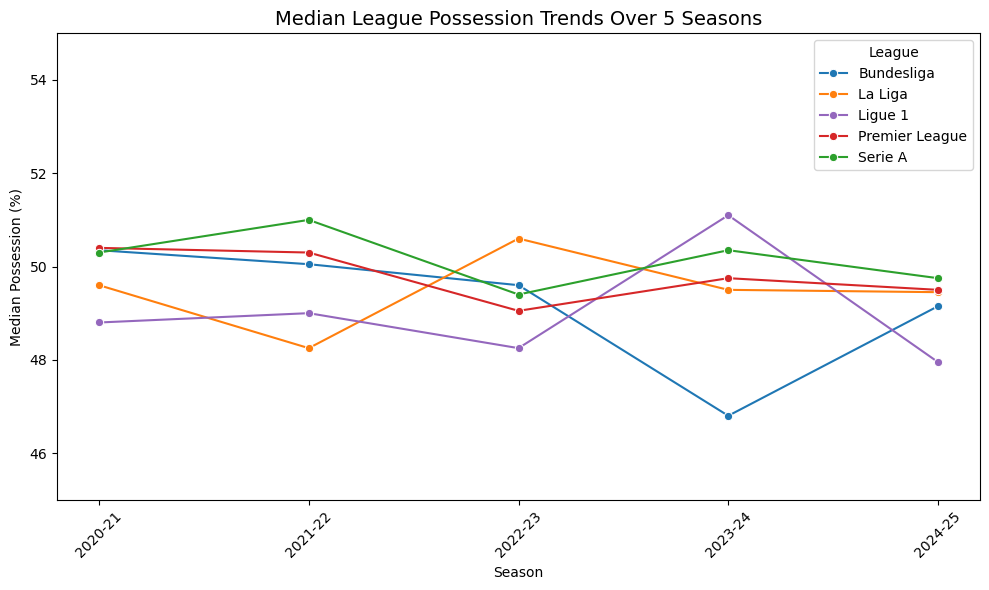

In [260]:
league_colors = {
    "Premier League": "#d62728", 
    "La Liga": "#ff7f0e",         
    "Bundesliga": "#1f77b4",      
    "Serie A": "#2ca02c",          
    "Ligue 1": "#9467bd"}

plt.figure(figsize=(10,6))
sns.lineplot(
    data=league_season_trends,
    x='Season',
    y='Avg_Possession',
    hue='League',
    marker='o',
    palette=league_colors)

plt.title("Median League Possession Trends Over 5 Seasons", fontsize=14)
plt.ylabel("Median Possession (%)")
plt.xlabel("Season")
plt.ylim(45, 55) 
plt.xticks(rotation=45)
plt.legend(title='League')
plt.tight_layout()
plt.savefig("league_possession_over_5_seasons.png", dpi=300, bbox_inches="tight")
plt.show()

In [111]:
league_mean = avg_possession_by_league.groupby('League')['Avg_Possession'].mean().reset_index()
league_median = avg_possession_by_league.groupby('League')['Avg_Possession'].median().reset_index()

league_summary = league_mean.merge(league_median, on='League')
league_summary.rename(columns={'Avg_Possession_x': 'Mean_Possession',
                                'Avg_Possession_y': 'Median_Possession'}, inplace=True)

league_max = avg_possession_by_league.groupby('League')['Avg_Possession'].max().reset_index()
league_min = avg_possession_by_league.groupby('League')['Avg_Possession'].min().reset_index()

league_range = league_max.merge(league_min, on='League')
league_range['Possession_Range'] = league_range['Avg_Possession_x'] - league_range['Avg_Possession_y']
league_range.rename(columns={'Avg_Possession_x': 'Max_Possession','Avg_Possession_y': 'Min_Possession'}, inplace=True)

league_possession_analysis = league_summary.merge(league_range[['League','Max_Possession','Min_Possession','Possession_Range']], on='League')

print(league_possession_analysis)

           League  Mean_Possession  Median_Possession  Max_Possession  \
0      Bundesliga        48.584583          46.612500           63.72   
1         La Liga        49.329630          49.300000           65.32   
2         Ligue 1        48.738462          47.533333           64.00   
3  Premier League        48.056173          47.000000           64.52   
4         Serie A        49.010179          48.516667           58.14   

   Min_Possession  Possession_Range  
0       41.500000         22.220000  
1       40.325000         24.995000  
2       41.233333         22.766667  
3       37.900000         26.620000  
4       42.100000         16.040000  


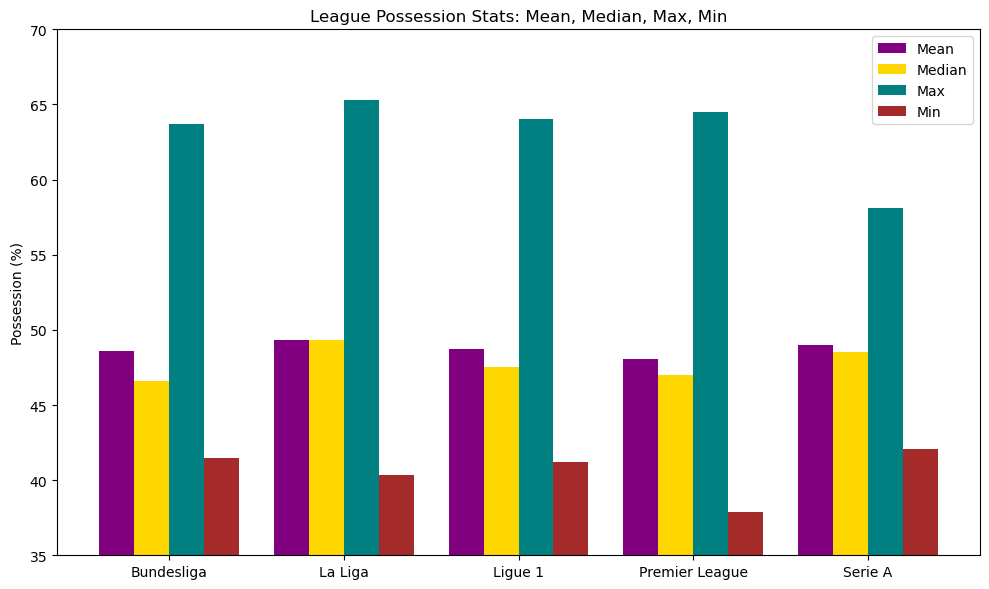

In [262]:
plt.figure(figsize=(10,6))

bar_width = 0.2
leagues = league_possession_analysis['League']
x = range(len(leagues))

plt.bar([p - 1.5*bar_width for p in x], league_possession_analysis['Mean_Possession'], width=bar_width, label='Mean', color='purple')
plt.bar([p - 0.5*bar_width for p in x], league_possession_analysis['Median_Possession'], width=bar_width, label='Median', color='gold')
plt.bar([p + 0.5*bar_width for p in x], league_possession_analysis['Max_Possession'], width=bar_width, label='Max', color='teal')
plt.bar([p + 1.5*bar_width for p in x], league_possession_analysis['Min_Possession'], width=bar_width, label='Min', color='brown')

plt.xticks(x, leagues)
plt.ylabel('Possession (%)')
plt.title('League Possession Stats: Mean, Median, Max, Min')
plt.ylim(35, 70)
plt.legend()
plt.tight_layout()
plt.savefig("league_possession_mean_median_max_min.png", dpi=300, bbox_inches="tight")
plt.show()

In [113]:
pl_df.head(2)

,Squad,Poss,90s,Gls,Ast,G_plus_A,G_minus_PK,xG,xAG,xG_plus_xAG,npxG_plus_xAG,PrgC,PrgP,CrdY,CrdR,Season,League,League_ID
0,Arsenal,56.9,38,1.76,1.45,3.21,1.71,1.58,1.19,2.77,2.73,852,1826,70,6,2024-25,Premier League,1
1,Aston Villa,50.5,38,1.47,1.18,2.66,1.39,1.48,1.10,2.57,2.45,720,1344,76,4,2024-25,Premier League,1


In [164]:
### ATTACKING STATS ###

In [116]:
league_goals_avg = complete_table_df.groupby("League")["Gls"].mean().sort_values(ascending=False)
print(league_goals_avg)

League
Bundesliga        1.525444
Premier League    1.405500
Ligue 1           1.362813
Serie A           1.322800
La Liga           1.242000
Name: Gls, dtype: float64


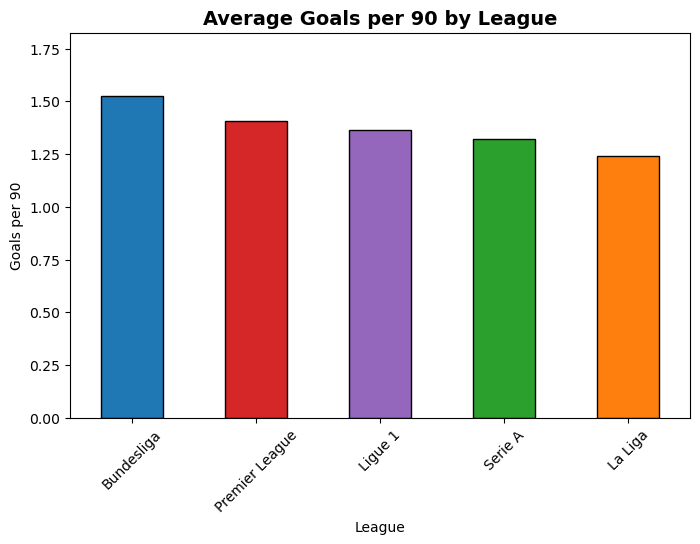

In [263]:
league_colors = {
    "Premier League": "#d62728", 
    "La Liga": "#ff7f0e",         
    "Bundesliga": "#1f77b4",      
    "Serie A": "#2ca02c",          
    "Ligue 1": "#9467bd"}

colors = [league_colors[league] for league in league_goals_avg.index]

plt.figure(figsize=(8,5))
league_goals_avg.plot(
    kind="bar", 
    color=colors,     
    edgecolor="black")

plt.title("Average Goals per 90 by League", fontsize=14, fontweight="bold")
plt.ylabel("Goals per 90")
plt.xlabel("League")
plt.xticks(rotation=45)
plt.ylim(0, league_goals_avg.max() + 0.3)
plt.savefig("avg_goal_per_90.png", dpi=300, bbox_inches="tight")
plt.show()

In [118]:
league_goals_std = complete_table_df.groupby("League")["Gls"].std().sort_values(ascending=False)
print(league_goals_std)

League
Bundesliga        0.508136
Premier League    0.451365
Serie A           0.414938
La Liga           0.401975
Ligue 1           0.399520
Name: Gls, dtype: float64


In [120]:
league_xG_avg = complete_table_df.groupby("League")["xG"].mean().sort_values(ascending=False)
print(league_xG_avg)

League
Bundesliga        1.459667
Premier League    1.403300
Ligue 1           1.380000
Serie A           1.295000
La Liga           1.266300
Name: xG, dtype: float64


In [122]:
league_xG_std = complete_table_df.groupby("League")["xG"].std().sort_values(ascending=False)
print(league_xG_std)

League
Bundesliga        0.375917
Premier League    0.358600
Ligue 1           0.328614
La Liga           0.318198
Serie A           0.310221
Name: xG, dtype: float64


In [124]:
best_scorers = complete_table_df.sort_values("Gls", ascending=False)[["Squad","League","Gls","xG"]].head(10)
print(best_scorers)

               Squad          League   Gls    xG
274    Bayern Munich      Bundesliga  2.88  2.23
201    Bayern Munich      Bundesliga  2.82  2.40
219    Bayern Munich      Bundesliga  2.74  2.50
256    Bayern Munich      Bundesliga  2.71  2.62
237    Bayern Munich      Bundesliga  2.65  2.20
402        Paris S-G         Ligue 1  2.62  2.61
103        Barcelona         La Liga  2.61  2.41
229       Leverkusen      Bundesliga  2.56  2.16
71   Manchester City  Premier League  2.53  2.33
32   Manchester City  Premier League  2.47  2.12


In [126]:
worst_scorers = complete_table_df.sort_values("Gls", ascending=True)[["Squad","League","Gls","xG"]].head(10)
print(worst_scorers)

             Squad          League   Gls    xG
94   Sheffield Utd  Premier League  0.50  0.86
74    Norwich City  Premier League  0.55  0.85
426        Ajaccio         Ligue 1  0.58  0.95
345      Sampdoria         Serie A  0.61  0.90
126          Cádiz         La Liga  0.66  0.95
469          Dijon         Ligue 1  0.66  0.89
16     Southampton  Premier League  0.66  0.86
313         Empoli         Serie A  0.68  0.95
87          Fulham  Premier League  0.68  1.07
272        Arminia      Bundesliga  0.68  0.97


In [127]:
complete_table_df["goal_efficiency"] = complete_table_df["Gls"] / complete_table_df["xG"]

In [128]:
league_efficiency_avg = complete_table_df.groupby("League")["goal_efficiency"].mean().sort_values(ascending=False)
print(league_efficiency_avg)

League
Bundesliga        1.030688
Serie A           1.009249
Premier League    0.990804
Ligue 1           0.982215
La Liga           0.971854
Name: goal_efficiency, dtype: float64


In [129]:
league_goals_mean = complete_table_df.groupby("League")["Gls"].mean()
league_goals_std = complete_table_df.groupby("League")["Gls"].std()

league_goals_cv = (league_goals_std / league_goals_mean).sort_values(ascending=False)
print(league_goals_cv)

League
Bundesliga        0.333107
La Liga           0.323651
Premier League    0.321142
Serie A           0.313682
Ligue 1           0.293158
Name: Gls, dtype: float64


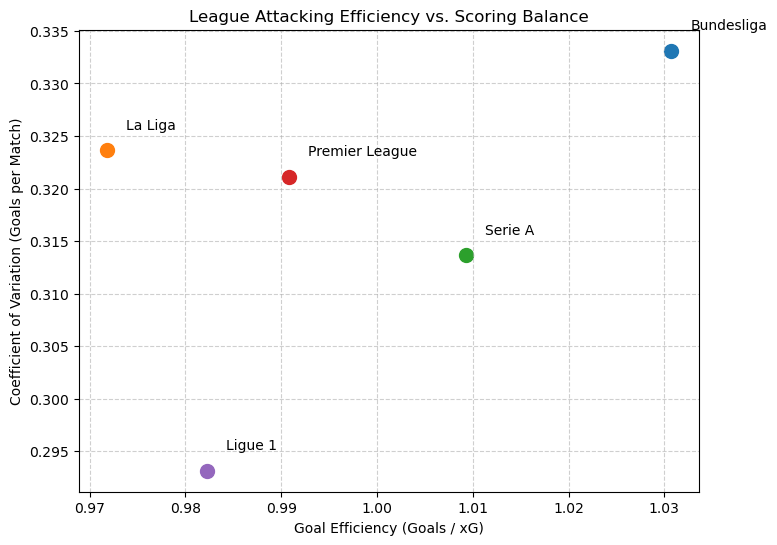

In [264]:
league_colors = {
    "Premier League": "#d62728", 
    "La Liga": "#ff7f0e",         
    "Bundesliga": "#1f77b4",      
    "Serie A": "#2ca02c",          
    "Ligue 1": "#9467bd"}

league_efficiency_avg = complete_table_df.groupby("League")["goal_efficiency"].mean()
league_goals_mean = complete_table_df.groupby("League")["Gls"].mean()
league_goals_std = complete_table_df.groupby("League")["Gls"].std()
league_goals_cv = league_goals_std / league_goals_mean

plt.figure(figsize=(8,6))

for league in league_efficiency_avg.index: 
    x = league_efficiency_avg[league]
    y = league_goals_cv[league]
    plt.scatter(x, y, s=100, color=league_colors.get(league, "gray"))
    plt.text(x + 0.002, y + 0.002, str(league), fontsize=10)

plt.xlabel("Goal Efficiency (Goals / xG)")
plt.ylabel("Coefficient of Variation (Goals per Match)")
plt.title("League Attacking Efficiency vs. Scoring Balance")
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig("attacking_efficiency_variation.png", dpi=300, bbox_inches="tight")
plt.show()

/var/folders/sp/zmqgkgsj1992h0k71dlr78_80000gn/T/ipykernel_13759/1973815408.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


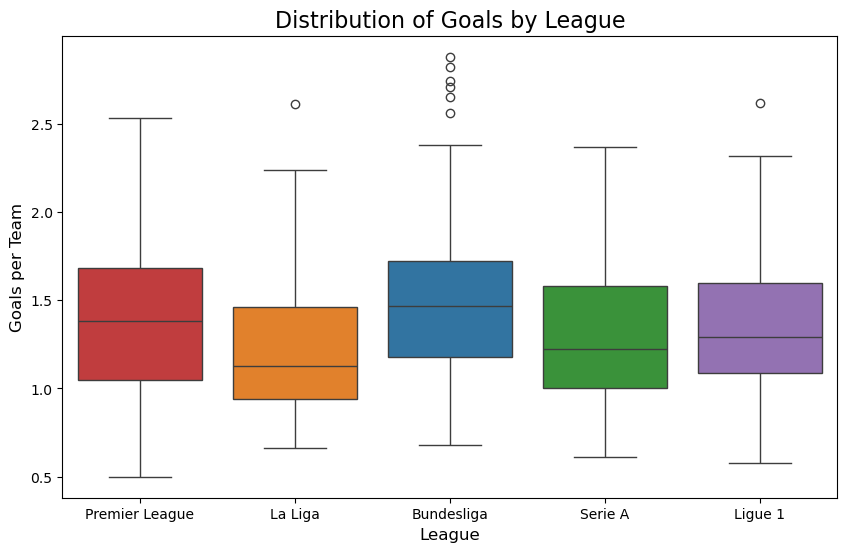

In [265]:
league_colors = {
    "Premier League": "#d62728", 
    "La Liga": "#ff7f0e",         
    "Bundesliga": "#1f77b4",      
    "Serie A": "#2ca02c",          
    "Ligue 1": "#9467bd"}

plt.figure(figsize=(10,6))
sns.boxplot(
    data=complete_table_df, 
    x="League", 
    y="Gls", 
    palette=league_colors)

plt.title("Distribution of Goals by League", fontsize=16)
plt.xlabel("League", fontsize=12)
plt.ylabel("Goals per Team", fontsize=12)
plt.savefig("goal_distribution_by_league.png", dpi=300, bbox_inches="tight")
plt.show()


In [141]:
#### for creating the csv file for tableau

In [143]:
avg_possession_by_league = complete_table_df.groupby(['League', 'Squad'])['Poss'].mean().reset_index()
avg_possession_by_league.rename(columns={'Poss': 'Avg_Possession'}, inplace=True)

league_mean = avg_possession_by_league.groupby('League')['Avg_Possession'].mean().reset_index()
league_median = avg_possession_by_league.groupby('League')['Avg_Possession'].median().reset_index()
league_summary = league_mean.merge(league_median, on='League')
league_summary.rename(columns={'Avg_Possession_x': 'Mean_Possession',
                               'Avg_Possession_y': 'Median_Possession'}, inplace=True)

league_max = avg_possession_by_league.groupby('League')['Avg_Possession'].max().reset_index()
league_min = avg_possession_by_league.groupby('League')['Avg_Possession'].min().reset_index()
league_range = league_max.merge(league_min, on='League')
league_range['Possession_Range'] = league_range['Avg_Possession_x'] - league_range['Avg_Possession_y']
league_range.rename(columns={'Avg_Possession_x': 'Max_Possession','Avg_Possession_y': 'Min_Possession'}, inplace=True)


league_possession_analysis = league_summary.merge(
    league_range[['League','Max_Possession','Min_Possession','Possession_Range']], on='League')


league_goals_mean = complete_table_df.groupby("League")["Gls"].mean().reset_index()
league_goals_std = complete_table_df.groupby("League")["Gls"].std().reset_index()
league_goals_cv = (league_goals_std["Gls"] / league_goals_mean["Gls"]).reset_index(drop=True)


league_xG_avg = complete_table_df.groupby("League")["xG"].mean().reset_index()
league_xG_std = complete_table_df.groupby("League")["xG"].std().reset_index()


league_efficiency_avg = complete_table_df.groupby("League")["goal_efficiency"].mean().reset_index()


league_attacking = league_goals_mean.merge(league_goals_std, on='League', suffixes=('_mean','_std'))
league_attacking['Gls_CV'] = league_goals_cv
league_attacking = league_attacking.merge(league_xG_avg, on='League')
league_attacking = league_attacking.merge(league_xG_std, on='League', suffixes=('_xG_mean','_xG_std'))
league_attacking = league_attacking.merge(league_efficiency_avg, on='League')


league_final_table = league_possession_analysis.merge(league_attacking, on='League')

league_final_table.to_csv("final_project_league_summary.csv", index=False)

print(league_final_table)

           League  Mean_Possession  Median_Possession  Max_Possession  \
0      Bundesliga        48.584583          46.612500           63.72   
1         La Liga        49.329630          49.300000           65.32   
2         Ligue 1        48.738462          47.533333           64.00   
3  Premier League        48.056173          47.000000           64.52   
4         Serie A        49.010179          48.516667           58.14   

   Min_Possession  Possession_Range  Gls_mean   Gls_std    Gls_CV  xG_xG_mean  \
0       41.500000         22.220000  1.525444  0.508136  0.333107    1.459667   
1       40.325000         24.995000  1.242000  0.401975  0.323651    1.266300   
2       41.233333         22.766667  1.362813  0.399520  0.293158    1.380000   
3       37.900000         26.620000  1.405500  0.451365  0.321142    1.403300   
4       42.100000         16.040000  1.322800  0.414938  0.313682    1.295000   

   xG_xG_std  goal_efficiency  
0   0.375917         1.030688  
1   0.3181

In [145]:
league_final_table.head()

,League,Mean_Possession,Median_Possession,Max_Possession,Min_Possession,Possession_Range,Gls_mean,Gls_std,Gls_CV,xG_xG_mean,xG_xG_std,goal_efficiency
0,Bundesliga,48.584583,46.612500,63.72,41.500000,22.220000,1.525444,0.508136,0.333107,1.459667,0.375917,1.030688
1,La Liga,49.329630,49.300000,65.32,40.325000,24.995000,1.242000,0.401975,0.323651,1.266300,0.318198,0.971854
2,Ligue 1,48.738462,47.533333,64.00,41.233333,22.766667,1.362813,0.399520,0.293158,1.380000,0.328614,0.982215
3,Premier League,48.056173,47.000000,64.52,37.900000,26.620000,1.405500,0.451365,0.321142,1.403300,0.358600,0.990804
4,Serie A,49.010179,48.516667,58.14,42.100000,16.040000,1.322800,0.414938,0.313682,1.295000,0.310221,1.009249


In [147]:
print(league_final_table[['League','Mean_Possession']])
print(league_possession_summary) 

print(league_final_table[['League','goal_efficiency']])
print(league_efficiency_avg) 

           League  Mean_Possession
0      Bundesliga        48.584583
1         La Liga        49.329630
2         Ligue 1        48.738462
3  Premier League        48.056173
4         Serie A        49.010179
           League  League_Avg_Possession
0      Bundesliga              48.584583
1         La Liga              49.329630
2         Ligue 1              48.738462
3  Premier League              48.056173
4         Serie A              49.010179
           League  goal_efficiency
0      Bundesliga         1.030688
1         La Liga         0.971854
2         Ligue 1         0.982215
3  Premier League         0.990804
4         Serie A         1.009249
           League  goal_efficiency
0      Bundesliga         1.030688
1         La Liga         0.971854
2         Ligue 1         0.982215
3  Premier League         0.990804
4         Serie A         1.009249


In [163]:
### TRANSITIONS/DIRECTNESS STATS ###

In [150]:
prgP_df = complete_table_df.groupby('League').agg(
    total_prgP=('PrgP', 'sum'),
    total_90s=('90s', 'sum')).reset_index()

prgP_df['PrgP_per_90'] = prgP_df['total_prgP'] / prgP_df['total_90s']

prgP_df = prgP_df[['League', 'PrgP_per_90']]
print(prgP_df)

           League  PrgP_per_90
0      Bundesliga    37.666993
1         La Liga    36.432632
2         Ligue 1    39.899829
3  Premier League    37.663684
4         Serie A    36.245789


In [151]:
prgC_df = complete_table_df.groupby('League').agg(
    total_prgC=('PrgC', 'sum'),
    total_90s=('90s', 'sum')).reset_index()

prgC_df['PrgC_per_90'] = prgC_df['total_prgC'] / prgC_df['total_90s']

prgC_df = prgC_df[['League', 'PrgC_per_90']]
print(prgC_df)

           League  PrgC_per_90
0      Bundesliga    15.883987
1         La Liga    16.560789
2         Ligue 1    17.709475
3  Premier League    18.073421
4         Serie A    17.251316


In [152]:
actions_df = complete_table_df.groupby('League').agg(
    total_prgP=('PrgP', 'sum'),
    total_prgC=('PrgC', 'sum'),
    avg_poss=('Poss', 'mean')).reset_index()

actions_df['avg_actions_per_poss'] = (actions_df['total_prgP'] + actions_df['total_prgC']) / actions_df['avg_poss']


actions_df = actions_df[['League', 'avg_actions_per_poss']]
print(actions_df)

           League  avg_actions_per_poss
0      Bundesliga           3277.757034
1         La Liga           4027.741664
2         Ligue 1           4037.344111
3  Premier League           4235.850566
4         Serie A           4065.373463


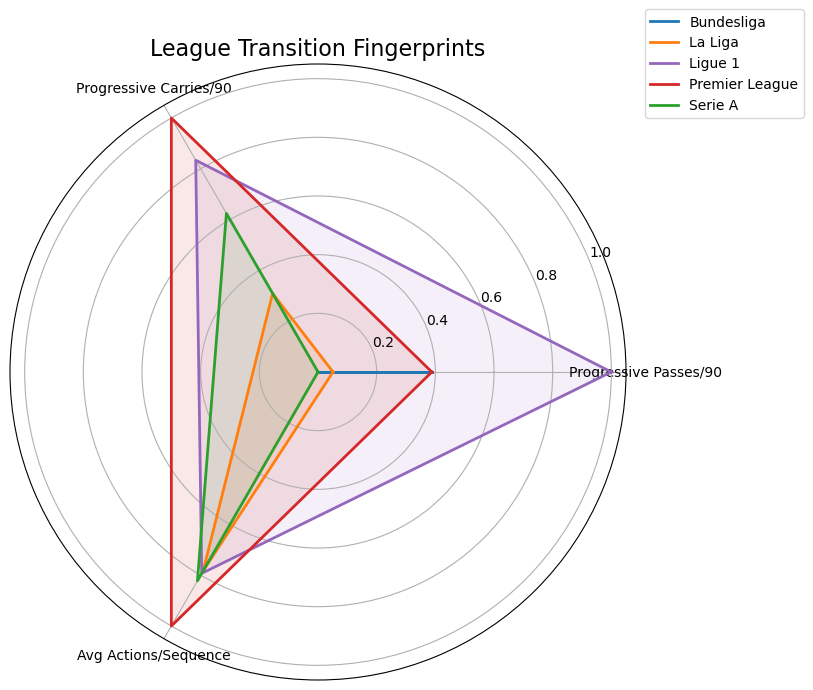

In [266]:
data = {
    'League': ['Bundesliga', 'La Liga', 'Ligue 1', 'Premier League', 'Serie A'],
    'PrgP_per_90': [37.667, 36.433, 39.900, 37.664, 36.246],
    'PrgC_per_90': [15.884, 16.561, 17.709, 18.073, 17.251],
    'avg_actions_per_poss': [3277.757, 4027.742, 4037.344, 4235.851, 4065.373]}

df = pd.DataFrame(data)

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[['PrgP_per_90','PrgC_per_90','avg_actions_per_poss']] = scaler.fit_transform(
    df[['PrgP_per_90','PrgC_per_90','avg_actions_per_poss']])

categories = ['Progressive Passes/90', 'Progressive Carries/90', 'Avg Actions/Sequence']
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

league_colors = {
    "Premier League": "#d62728", 
    "La Liga": "#ff7f0e",         
    "Bundesliga": "#1f77b4",      
    "Serie A": "#2ca02c",          
    "Ligue 1": "#9467bd"}

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

for i, row in df_scaled.iterrows():
    values = row[['PrgP_per_90','PrgC_per_90','avg_actions_per_poss']].tolist()
    values += values[:1]
    
    league = row['League']
    color = league_colors.get(league, "gray")
    
    ax.plot(angles, values, linewidth=2, label=league, color=color)
    ax.fill(angles, values, alpha=0.1, color=color)

ax.set_thetagrids(np.degrees(angles[:-1]), categories)
plt.title('League Transition Fingerprints', size=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.savefig("transition_fingerprints.png", dpi=300, bbox_inches="tight")
plt.show()

In [161]:
complete_table_df['avg_actions_per_poss'] = (complete_table_df['PrgP'] + complete_table_df['PrgC']) / complete_table_df['Poss']

top5_direct = complete_table_df.nsmallest(5, 'avg_actions_per_poss')[['Squad','League','avg_actions_per_poss']]

top5_least_direct = complete_table_df.nlargest(5, 'avg_actions_per_poss')[['Squad','League','avg_actions_per_poss']]

print("Top 5 Most Direct Teams:")
print(top5_direct)

print("\nTop 5 Least Direct Teams:")
print(top5_least_direct)

Top 5 Most Direct Teams:
             Squad      League  avg_actions_per_poss
236       Augsburg  Bundesliga             28.249400
209  Holstein Kiel  Bundesliga             28.302752
272        Arminia  Bundesliga             29.267139
249     Schalke 04  Bundesliga             29.326087
238         Bochum  Bundesliga             29.761388

Top 5 Least Direct Teams:
               Squad          League  avg_actions_per_poss
370         Atalanta         Serie A             54.047619
436           Monaco         Ligue 1             52.676349
71   Manchester City  Premier League             52.518409
141    Athletic Club         La Liga             51.937984
175      Real Madrid         La Liga             51.869783


In [162]:
### PHYSICALITY STATS ###

In [172]:
league_yellows = complete_table_df.groupby(["League"]).agg(
    total_yellows=("CrdY", "sum"),
    total_90s=("90s", "sum")).reset_index()

league_yellows["yellow_per90"] = league_yellows["total_yellows"] / league_yellows["total_90s"]

league_yellows = league_yellows[["League", "yellow_per90"]]

print(league_yellows)

           League  yellow_per90
0      Bundesliga      1.930719
1         La Liga      2.401579
2         Ligue 1      1.887842
3  Premier League      1.871579
4         Serie A      2.178421


In [175]:
league_reds = complete_table_df.groupby(["League"]).agg(
    total_reds=("CrdR", "sum"),
    total_90s=("90s", "sum")).reset_index()

league_reds["red_per90"] = league_reds["total_reds"] / league_reds["total_90s"]

league_reds = league_reds[["League", "red_per90"]]

print(league_reds)

           League  red_per90
0      Bundesliga   0.068627
1         La Liga   0.125263
2         Ligue 1   0.126427
3  Premier League   0.060789
4         Serie A   0.098158


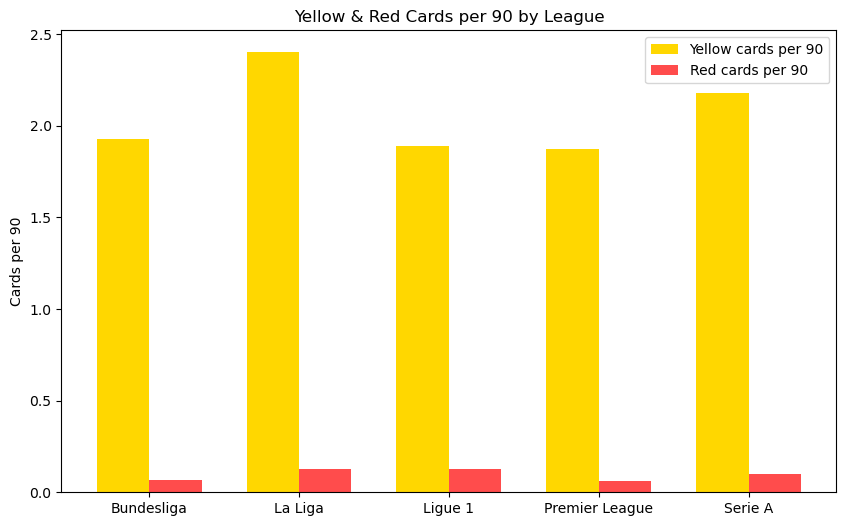

In [267]:
leagues = league_phys["League"]
yellow = league_phys["yellow_per90"]
red = league_phys["red_per90"]

x = np.arange(len(leagues)) 
width = 0.35 

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, yellow, width, label='Yellow cards per 90', color='gold')
rects2 = ax.bar(x + width/2, red, width, label='Red cards per 90', color='red', alpha=0.7)

ax.set_ylabel('Cards per 90')
ax.set_title('Yellow & Red Cards per 90 by League')
ax.set_xticks(x)
ax.set_xticklabels(leagues)
ax.legend()

plt.savefig("yellow_red_cards_per_90.png", dpi=300, bbox_inches="tight")
plt.show()

In [248]:
league_phys = pd.merge(league_yellows, league_reds, on="League")

league_phys["physicality_index"] = (league_phys["yellow_per90"] * 0.5) + (league_phys["red_per90"] * 1)

print(league_phys)

           League  yellow_per90  red_per90  physicality_index
0      Bundesliga      1.930719   0.068627           1.033987
1         La Liga      2.401579   0.125263           1.326053
2         Ligue 1      1.887842   0.126427           1.070348
3  Premier League      1.871579   0.060789           0.996579
4         Serie A      2.178421   0.098158           1.187368


/var/folders/sp/zmqgkgsj1992h0k71dlr78_80000gn/T/ipykernel_13759/121666553.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


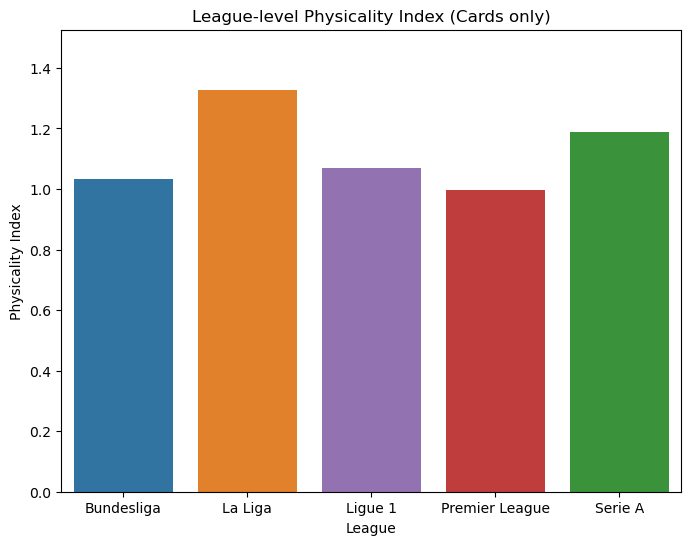

In [268]:
league_colors = {
    "Premier League": "#d62728", 
    "La Liga": "#ff7f0e",         
    "Bundesliga": "#1f77b4",      
    "Serie A": "#2ca02c",          
    "Ligue 1": "#9467bd"}

plt.figure(figsize=(8,6))
sns.barplot(
    x="League", 
    y="physicality_index", 
    data=league_phys, 
    palette=league_colors)

plt.ylabel("Physicality Index")
plt.title("League-level Physicality Index (Cards only)")
plt.ylim(0, league_phys["physicality_index"].max() + 0.2)
plt.savefig("physicality_index.png", dpi=300, bbox_inches="tight")
plt.show()

In [247]:
team_cards = complete_table_df.copy()
team_cards["yellow_per90"] = team_cards["CrdY"] / team_cards["90s"]
team_cards["red_per90"] = team_cards["CrdR"] / team_cards["90s"]

team_cards["total_cards_per90"] = team_cards["yellow_per90"] + team_cards["red_per90"]

In [179]:
top_5_carded = team_cards.sort_values("total_cards_per90", ascending=False).head(5)
print(top_5_carded[["Squad", "League", "Season", "yellow_per90", "red_per90", "total_cards_per90"]])

        Squad   League   Season  yellow_per90  red_per90  total_cards_per90
128    Getafe  La Liga  2023-24      3.552632   0.263158           3.815789
178  Valencia  La Liga  2021-22      3.526316   0.210526           3.736842
149    Getafe  La Liga  2022-23      3.315789   0.236842           3.552632
156   Sevilla  La Liga  2022-23      3.184211   0.342105           3.526316
169    Getafe  La Liga  2021-22      3.184211   0.210526           3.394737


In [180]:
least_5_carded = team_cards.sort_values("total_cards_per90", ascending=True).head(5)
print(least_5_carded[["Squad", "League", "Season", "yellow_per90", "red_per90", "total_cards_per90"]])

               Squad          League   Season  yellow_per90  red_per90  \
260         Freiburg      Bundesliga  2021-22      1.000000   0.000000   
90         Liverpool  Premier League  2020-21      1.052632   0.000000   
402        Paris S-G         Ligue 1  2024-25      1.088235   0.000000   
256    Bayern Munich      Bundesliga  2021-22      1.058824   0.058824   
71   Manchester City  Premier League  2021-22      1.105263   0.026316   

     total_cards_per90  
260           1.000000  
90            1.052632  
402           1.088235  
256           1.117647  
71            1.131579  


In [188]:
final_table = league_final_table.copy()

final_table = final_table.merge(prgP_df, on="League", how="left")
final_table = final_table.merge(prgC_df, on="League", how="left")
final_table = final_table.merge(actions_df, on="League", how="left")

final_table = final_table.merge(league_phys, on="League", how="left")

In [189]:
final_table.head()

,League,Mean_Possession,Median_Possession,Max_Possession,Min_Possession,Possession_Range,Gls_mean,Gls_std,Gls_CV,xG_xG_mean,xG_xG_std,goal_efficiency,PrgP_per_90,PrgC_per_90,avg_actions_per_poss,yellow_per90,red_per90,physicality_index,avg_poss,physicality_index_with_poss
0,Bundesliga,48.584583,46.612500,63.72,41.500000,22.220000,1.525444,0.508136,0.333107,1.459667,0.375917,1.030688,37.666993,15.883987,3277.757034,1.930719,0.068627,1.033987,49.993333,2.034120
1,La Liga,49.329630,49.300000,65.32,40.325000,24.995000,1.242000,0.401975,0.323651,1.266300,0.318198,0.971854,36.432632,16.560789,4027.741664,2.401579,0.125263,1.326053,49.997000,2.326113
2,Ligue 1,48.738462,47.533333,64.00,41.233333,22.766667,1.362813,0.399520,0.293158,1.380000,0.328614,0.982215,39.899829,17.709475,4037.344111,1.887842,0.126427,1.070348,49.998958,2.070369
3,Premier League,48.056173,47.000000,64.52,37.900000,26.620000,1.405500,0.451365,0.321142,1.403300,0.358600,0.990804,37.663684,18.073421,4235.850566,1.871579,0.060789,0.996579,50.002000,1.996539
4,Serie A,49.010179,48.516667,58.14,42.100000,16.040000,1.322800,0.414938,0.313682,1.295000,0.310221,1.009249,36.245789,17.251316,4065.373463,2.178421,0.098158,1.187368,50.005000,2.187268


In [190]:
final_table.to_csv("league_final_table_full.csv", index=False)

In [195]:
### DEFENSIVE (PROXY) STATS ###

In [196]:
def_workload = complete_table_df.groupby("League").agg(
    avg_poss=("Poss", "mean")
).reset_index()

def_workload["def_workload"] = 100 - def_workload["avg_poss"]

def_workload = def_workload[["League", "def_workload"]]

print(def_workload)

           League  def_workload
0      Bundesliga     50.006667
1         La Liga     50.003000
2         Ligue 1     50.001042
3  Premier League     49.998000
4         Serie A     49.995000


In [197]:
league_phys["def_aggression"] = league_phys["yellow_per90"] + league_phys["red_per90"]

def_aggression = league_phys[["League", "def_aggression"]]

print(def_aggression)

           League  def_aggression
0      Bundesliga        1.999346
1         La Liga        2.526842
2         Ligue 1        2.014269
3  Premier League        1.932368
4         Serie A        2.276579


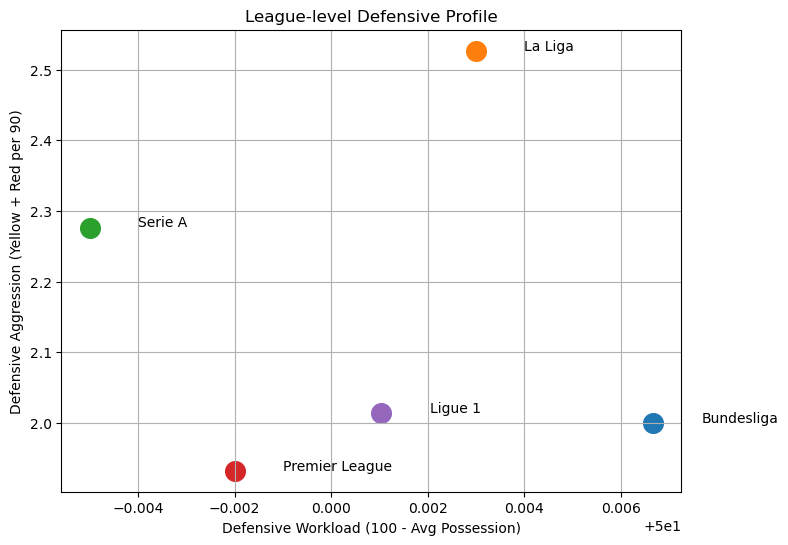

In [269]:
league_colors = {
    "Premier League": "#d62728", 
    "La Liga": "#ff7f0e",         
    "Bundesliga": "#1f77b4",      
    "Serie A": "#2ca02c",          
    "Ligue 1": "#9467bd"}

plt.figure(figsize=(8,6))

for i, row in league_defense.iterrows():
    league = row["League"]
    color = league_colors.get(league, "gray")  # default to gray if missing
    plt.scatter(row["def_workload"], row["def_aggression"], s=200, color=color)
    plt.text(row["def_workload"] + 0.001, row["def_aggression"] + 0.001, 
             str(league), fontsize=10)

plt.xlabel("Defensive Workload (100 - Avg Possession)")
plt.ylabel("Defensive Aggression (Yellow + Red per 90)")
plt.title("League-level Defensive Profile")
plt.grid(True)
plt.savefig("defensive_profiles.png", dpi=300, bbox_inches="tight")
plt.show()

In [259]:
league_def_eff = complete_table_df.groupby("League").agg(
    total_xG=("xG", "sum"),
    total_goals=("Gls", "sum")).reset_index()

league_def_eff["def_efficiency"] = (league_def_eff["total_xG"] - league_def_eff["total_goals"]) / league_def_eff["total_xG"]

print(league_def_eff[["League", "def_efficiency"]])

           League  def_efficiency
0      Bundesliga       -0.045064
1         La Liga        0.019190
2         Ligue 1        0.012455
3  Premier League       -0.001568
4         Serie A       -0.021467


In [252]:
final_table = final_table.merge(def_workload, on="League", how="left")

final_table = final_table.merge(def_aggression, on="League", how="left")

final_table = final_table.merge(league_def_eff[["League", "def_efficiency"]], on="League", how="left")

final_table.head()

,League,Mean_Possession,Median_Possession,Max_Possession,Min_Possession,Possession_Range,Gls_mean,Gls_std,Gls_CV,xG_xG_mean,...,red_per90,physicality_index,avg_poss,physicality_index_with_poss,def_workload_x,def_aggression_x,def_efficiency_x,def_workload_y,def_aggression_y,def_efficiency_y
0,Bundesliga,48.584583,46.612500,63.72,41.500000,22.220000,1.525444,0.508136,0.333107,1.459667,...,0.068627,1.033987,49.993333,2.034120,50.006667,1.999346,-0.045064,50.006667,1.999346,-0.045064
1,La Liga,49.329630,49.300000,65.32,40.325000,24.995000,1.242000,0.401975,0.323651,1.266300,...,0.125263,1.326053,49.997000,2.326113,50.003000,2.526842,0.019190,50.003000,2.526842,0.019190
2,Ligue 1,48.738462,47.533333,64.00,41.233333,22.766667,1.362813,0.399520,0.293158,1.380000,...,0.126427,1.070348,49.998958,2.070369,50.001042,2.014269,0.012455,50.001042,2.014269,0.012455
3,Premier League,48.056173,47.000000,64.52,37.900000,26.620000,1.405500,0.451365,0.321142,1.403300,...,0.060789,0.996579,50.002000,1.996539,49.998000,1.932368,-0.001568,49.998000,1.932368,-0.001568
4,Serie A,49.010179,48.516667,58.14,42.100000,16.040000,1.322800,0.414938,0.313682,1.295000,...,0.098158,1.187368,50.005000,2.187268,49.995000,2.276579,-0.021467,49.995000,2.276579,-0.021467


In [256]:
final_table = final_table.drop(columns=["def_workload_y", "def_aggression_y", "def_efficiency_y"])

final_table = final_table.rename(columns={
    "def_workload_x": "def_workload",
    "def_aggression_x": "def_aggression",
    "def_efficiency_x": "def_efficiency"})

final_table.head()

,League,Mean_Possession,Median_Possession,Max_Possession,Min_Possession,Possession_Range,Gls_mean,Gls_std,Gls_CV,xG_xG_mean,...,PrgC_per_90,avg_actions_per_poss,yellow_per90,red_per90,physicality_index,avg_poss,physicality_index_with_poss,def_workload,def_aggression,def_efficiency
0,Bundesliga,48.584583,46.612500,63.72,41.500000,22.220000,1.525444,0.508136,0.333107,1.459667,...,15.883987,3277.757034,1.930719,0.068627,1.033987,49.993333,2.034120,50.006667,1.999346,-0.045064
1,La Liga,49.329630,49.300000,65.32,40.325000,24.995000,1.242000,0.401975,0.323651,1.266300,...,16.560789,4027.741664,2.401579,0.125263,1.326053,49.997000,2.326113,50.003000,2.526842,0.019190
2,Ligue 1,48.738462,47.533333,64.00,41.233333,22.766667,1.362813,0.399520,0.293158,1.380000,...,17.709475,4037.344111,1.887842,0.126427,1.070348,49.998958,2.070369,50.001042,2.014269,0.012455
3,Premier League,48.056173,47.000000,64.52,37.900000,26.620000,1.405500,0.451365,0.321142,1.403300,...,18.073421,4235.850566,1.871579,0.060789,0.996579,50.002000,1.996539,49.998000,1.932368,-0.001568
4,Serie A,49.010179,48.516667,58.14,42.100000,16.040000,1.322800,0.414938,0.313682,1.295000,...,17.251316,4065.373463,2.178421,0.098158,1.187368,50.005000,2.187268,49.995000,2.276579,-0.021467


In [257]:
final_table

,League,Mean_Possession,Median_Possession,Max_Possession,Min_Possession,Possession_Range,Gls_mean,Gls_std,Gls_CV,xG_xG_mean,...,PrgC_per_90,avg_actions_per_poss,yellow_per90,red_per90,physicality_index,avg_poss,physicality_index_with_poss,def_workload,def_aggression,def_efficiency
0,Bundesliga,48.584583,46.612500,63.72,41.500000,22.220000,1.525444,0.508136,0.333107,1.459667,...,15.883987,3277.757034,1.930719,0.068627,1.033987,49.993333,2.034120,50.006667,1.999346,-0.045064
1,La Liga,49.329630,49.300000,65.32,40.325000,24.995000,1.242000,0.401975,0.323651,1.266300,...,16.560789,4027.741664,2.401579,0.125263,1.326053,49.997000,2.326113,50.003000,2.526842,0.019190
2,Ligue 1,48.738462,47.533333,64.00,41.233333,22.766667,1.362813,0.399520,0.293158,1.380000,...,17.709475,4037.344111,1.887842,0.126427,1.070348,49.998958,2.070369,50.001042,2.014269,0.012455
3,Premier League,48.056173,47.000000,64.52,37.900000,26.620000,1.405500,0.451365,0.321142,1.403300,...,18.073421,4235.850566,1.871579,0.060789,0.996579,50.002000,1.996539,49.998000,1.932368,-0.001568
4,Serie A,49.010179,48.516667,58.14,42.100000,16.040000,1.322800,0.414938,0.313682,1.295000,...,17.251316,4065.373463,2.178421,0.098158,1.187368,50.005000,2.187268,49.995000,2.276579,-0.021467


In [258]:
final_table.to_csv("final_table.csv", index=False)